### Import Necessary Packages:

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
sns.set(color_codes=True)


### Dataset Reading and Cleaning:

In [119]:
day_wise_data = pd.read_csv("day.csv")

In [120]:
day_wise_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [121]:
day_wise_data.shape

(730, 16)

In [122]:
day_wise_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Data Preparation:

In [123]:
day_wise_data["season"] = day_wise_data["season"].astype('category')


In [124]:
day_wise_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


{'whiskers': [<matplotlib.lines.Line2D at 0x183e42272e0>,
 'caps': [<matplotlib.lines.Line2D at 0x183e4227820>,
 'boxes': [<matplotlib.lines.Line2D at 0x183e421afa0>],
 'medians': [<matplotlib.lines.Line2D at 0x183e4227e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x183e42321f0>],
 'means': []}

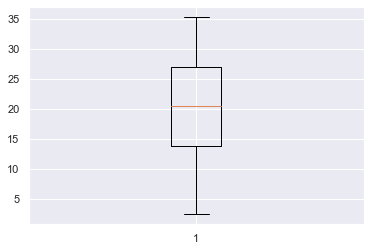

In [125]:
plt.boxplot(day_wise_data["temp"])

## Exploratory data analysis:

## Univariate Analysis:
### 1. Temperature Analysis


C:\Users\Eruvaka1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

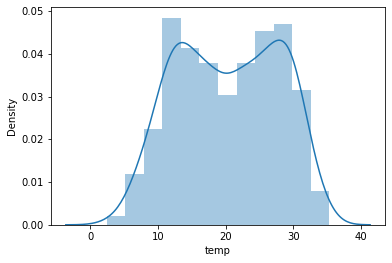

In [8]:
sns.distplot(day_wise_data["temp"],kde="True")

#### Insights:
#### 1. we can see from the distribution, on average most of the records are falling between 15-35 degrees celsuis.
####  2. Season will be one factor to check the temperature ranges,this will also effect the demand in the bikes.

#### Feeling Temperature In celsius: 

C:\Users\Eruvaka1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='atemp', ylabel='Density'>

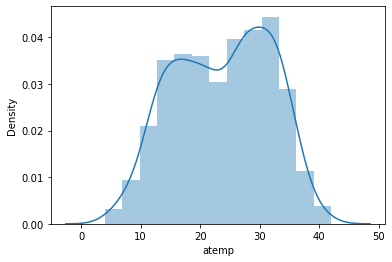

In [9]:
sns.distplot(day_wise_data["atemp"],kde="True")

#### Insights:


### New Metrics :

In [10]:
## difference between feeling temperature- actual temperature in celsius
day_wise_data["diff_temperature"] = day_wise_data["temp"] - day_wise_data["atemp"]

C:\Users\Eruvaka1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff_temperature', ylabel='Density'>

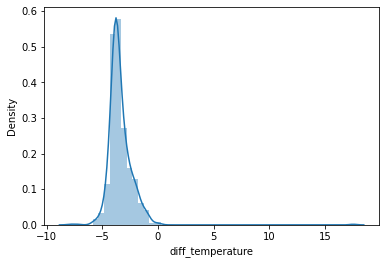

In [11]:
sns.distplot(day_wise_data["diff_temperature"],kde="True")

#### Insights:
#### 1. In this dataset,maximum humans can be able to handle the feeling_temperature +- 5

### Humidity:

C:\Users\Eruvaka1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum', ylabel='Density'>

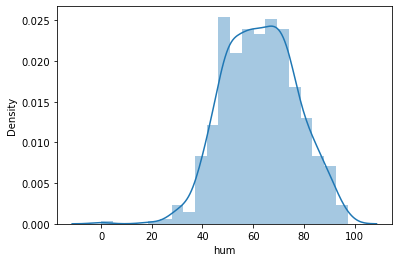

In [12]:
sns.distplot(day_wise_data["hum"],kde="True")

### Insights:

C:\Users\Eruvaka1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

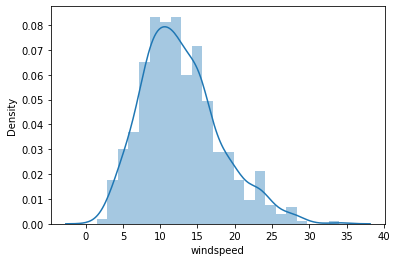

In [13]:
sns.distplot(day_wise_data["windspeed"],kde="True")

### Insights: 

### Casual:

### Binning the variables:

In [23]:
bins=[i for i in range(0,int(max(day_wise_data["casual"])),500)]
    
day_wise_data["casual_binning"] = pd.cut(day_wise_data['casual'],bins)


<AxesSubplot:ylabel='casual_binning'>

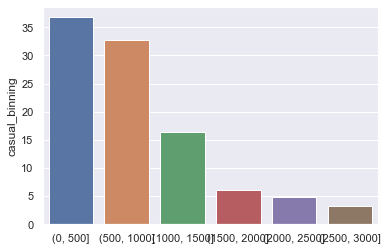

In [44]:
casual_bins = day_wise_data["casual_binning"].value_counts(normalize=True)*100

sns.barplot(x=casual_bins.index, y="casual_binning", data=casual_bins.reset_index())

## Insights:


### Registered users:

In [56]:
day_wise_data["registered_users_binning"] = pd.cut(day_wise_data['registered'],bins)


<AxesSubplot:ylabel='registered_users_binning'>

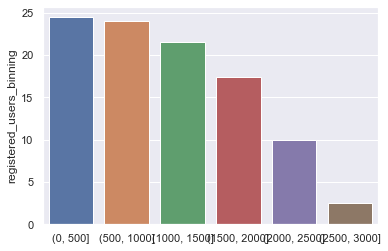

In [57]:
registered_users_binning = day_wise_data["registered_users_binning"].value_counts(normalize=True)*100

sns.barplot(x=casual_bins.index, y="registered_users_binning", data=registered_users_binning.reset_index())

### Insights:

### Total Users:

In [49]:
day_wise_data["total_users_binning"] = pd.cut(day_wise_data['cnt'],bins)


<AxesSubplot:ylabel='total_users_binning'>

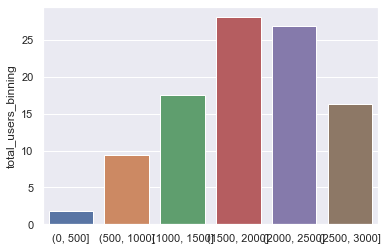

In [54]:
total_users_binning = day_wise_data["total_users_binning"].value_counts(normalize=True)*100

sns.barplot(x=total_users_binning.index, y="total_users_binning", data=total_users_binning.reset_index())

### Multivariate Analysis:

### Seasons vs Average Temperature:
1. Seasons and temperature are one of the few important factors for bike demand.
2. Weather conditions vs temperature vs bike demands.

In [105]:
season_data = day_wise_data.groupby(["season"],as_index=False).agg({"temp":"mean","atemp":"mean","windspeed":"mean","hum":"mean","casual":"sum","registered":"sum","cnt":"sum"})

In [106]:
season_data.head()

,season,temp,atemp,windspeed,hum,casual,registered,cnt
0,1,12.197035,14.831376,14.387168,58.167024,60557,408957,469514
1,2,22.320611,26.015366,13.634978,62.694833,203522,715067,918589
2,3,28.958682,32.794920,11.530366,63.348206,226091,835038,1061129
3,4,17.339148,20.776937,11.523637,66.871917,129782,711831,841613


### Insights:

<AxesSubplot:xlabel='season', ylabel='atemp'>

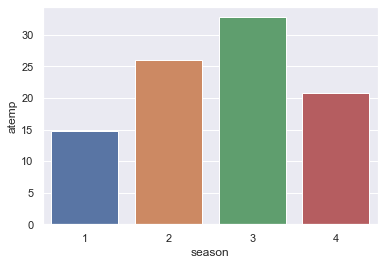

In [93]:
### Temp vs season
sns.barplot(x="season", y="atemp", data=season_data)

<AxesSubplot:xlabel='season', ylabel='cnt'>

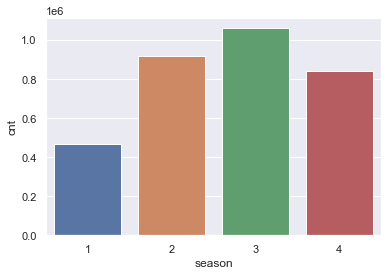

In [94]:
### seasons vs bikes demand count
sns.barplot(x="season", y="cnt", data=season_data)

### Seasons vs weathersit vs demand of the bikes(count):

<AxesSubplot:xlabel='season', ylabel='cnt'>

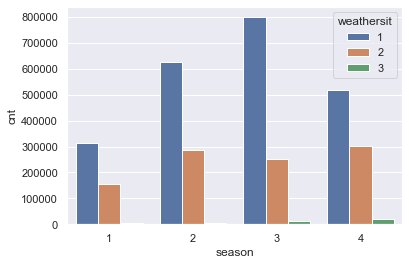

In [114]:
season_data = day_wise_data.groupby(["season","weathersit"],as_index=False).agg({"temp":"mean","atemp":"mean","windspeed":"mean","hum":"mean","casual":"sum","registered":"sum","cnt":"sum"})
sns.barplot(x="season", y="cnt", data=season_data,hue="weathersit")

### Final words about climatic conditions and seasons vs bikes demand:

#### 1. As we can see from the graph, most of the users are preferring bike demands in temperature 25-30 degree celsuis in Summer and fall season.
#### 2. In Fall season,Most of the users are preferring the bikes if weather is clear (Few clouds, Partly cloudy, Partly cloudy).
#### 3. We can see whenever climate condtions are  heavy rains and thunderstorms(category 3 and 4)  ,people are very less preferring the bikes.